In [7]:
MERCHAINDISE = 'ADAUSDT'
DAYS = 1000

# format = YYYY-MM-DD
START_DATE = '2021-10-2'
END_DATE = '2021-12-7'

DATE_FORMAT = "%Y-%m-%d"


In [13]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, diff_days, unique_list
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*30, "DESC")

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices)

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)

print(data_prices)


                            open   high  close    low     volumn  hour_return  \
date                                                                            
2022-04-05 12:00:00+07:00  1.208  1.210  1.207  1.205   436751.0    -0.082781   
2022-04-05 11:00:00+07:00  1.212  1.215  1.207  1.206  3000090.0    -0.412541   
2022-04-05 10:00:00+07:00  1.208  1.215  1.212  1.208  2114440.0     0.331126   
2022-04-05 09:00:00+07:00  1.216  1.218  1.208  1.207  3515380.0    -0.657895   
2022-04-05 08:00:00+07:00  1.212  1.218  1.216  1.205  2862440.0     0.330033   
...                          ...    ...    ...    ...        ...          ...   
2022-03-06 17:00:00+07:00  0.836  0.839  0.831  0.828  7474880.0    -0.598086   
2022-03-06 16:00:00+07:00  0.850  0.851  0.836  0.836  4271420.0    -1.647059   
2022-03-06 15:00:00+07:00  0.854  0.855  0.849  0.849  2015410.0    -0.585480   
2022-03-06 14:00:00+07:00  0.854  0.858  0.853  0.850  1620320.0    -0.117096   
2022-03-06 13:00:00+07:00  0

In [14]:
data_price_1 = data_prices[(data_prices['hour'] == 1)]['type'].to_list()
data_price_2 = data_prices[(data_prices['hour'] == 2)]['type'].to_list()
data_price_3 = data_prices[(data_prices['hour'] == 3)]['type'].to_list()
data_price_4 = data_prices[(data_prices['hour'] == 4)]['type'].to_list()
data_price_5 = data_prices[(data_prices['hour'] == 5)]['type'].to_list()
data_price_6 = data_prices[(data_prices['hour'] == 6)]['type'].to_list()
data_price_7 = data_prices[(data_prices['hour'] == 7)]['type'].to_list()
data_price_8 = data_prices[(data_prices['hour'] == 8)]['type'].to_list()
data_price_9 = data_prices[(data_prices['hour'] == 9)]['type'].to_list()
data_price_10 = data_prices[(data_prices['hour'] == 10)]['type'].to_list()
data_price_11 = data_prices[(data_prices['hour'] == 11)]['type'].to_list()
data_price_12 = data_prices[(data_prices['hour'] == 12)]['type'].to_list()
data_price_13 = data_prices[(data_prices['hour'] == 13)]['type'].to_list()
data_price_14 = data_prices[(data_prices['hour'] == 14)]['type'].to_list()
data_price_15 = data_prices[(data_prices['hour'] == 15)]['type'].to_list()
data_price_16 = data_prices[(data_prices['hour'] == 16)]['type'].to_list()
data_price_17 = data_prices[(data_prices['hour'] == 17)]['type'].to_list()
data_price_18 = data_prices[(data_prices['hour'] == 18)]['type'].to_list()
data_price_19 = data_prices[(data_prices['hour'] == 19)]['type'].to_list()
data_price_20 = data_prices[(data_prices['hour'] == 20)]['type'].to_list()
data_price_21 = data_prices[(data_prices['hour'] == 21)]['type'].to_list()
data_price_22 = data_prices[(data_prices['hour'] == 22)]['type'].to_list()
data_price_23 = data_prices[(data_prices['hour'] == 23)]['type'].to_list()
data_price_0 = data_prices[(data_prices['hour'] == 0)]['type'].to_list()

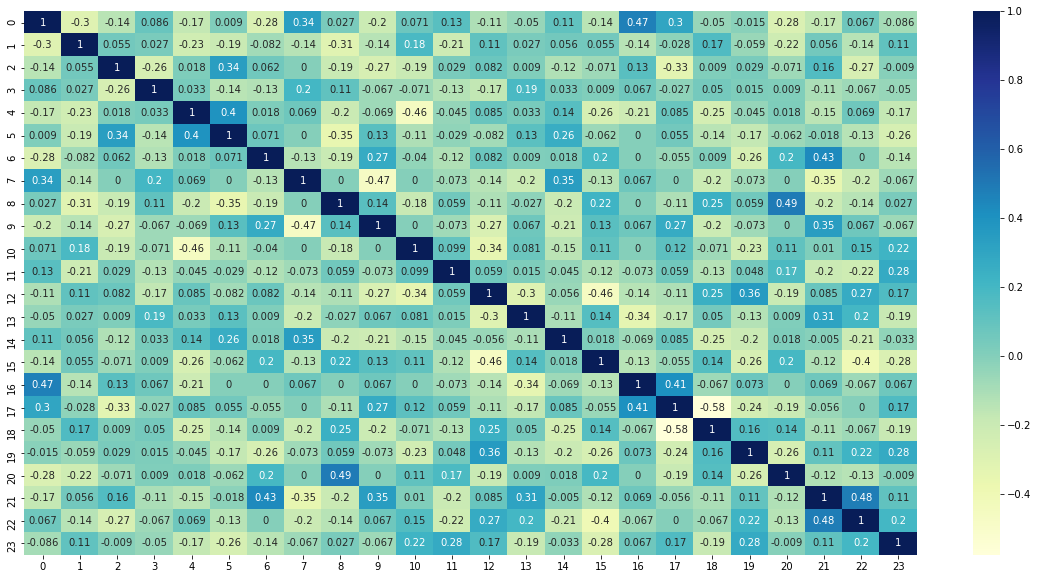

In [15]:
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import pandas as pd


data_dict = {}

for i in range(0,24):
    x = f"data_price_{i}"
    x_values = []
    for j in range(0,24):
        y = f"data_price_{j}"
        phi_coefficient = round(matthews_corrcoef(globals()[x], globals()[y]), 3)
        x_values.append(phi_coefficient)
    data_dict[i] = x_values 

df = pd.DataFrame(data_dict, index=range(0,24))
fig, ax = plt.subplots(figsize=[20,10])  
ax = sns.heatmap(df, annot=True, cmap="YlGnBu", ax=ax)


<ipython-input-5-db0dc685c1b9>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = tuple(data_price_9_12[(data_prices['hour'] == 9)]['hour_return'])
<ipython-input-5-db0dc685c1b9>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = tuple(data_price_9_12[(data_prices['hour'] == 12)]['hour_return'])


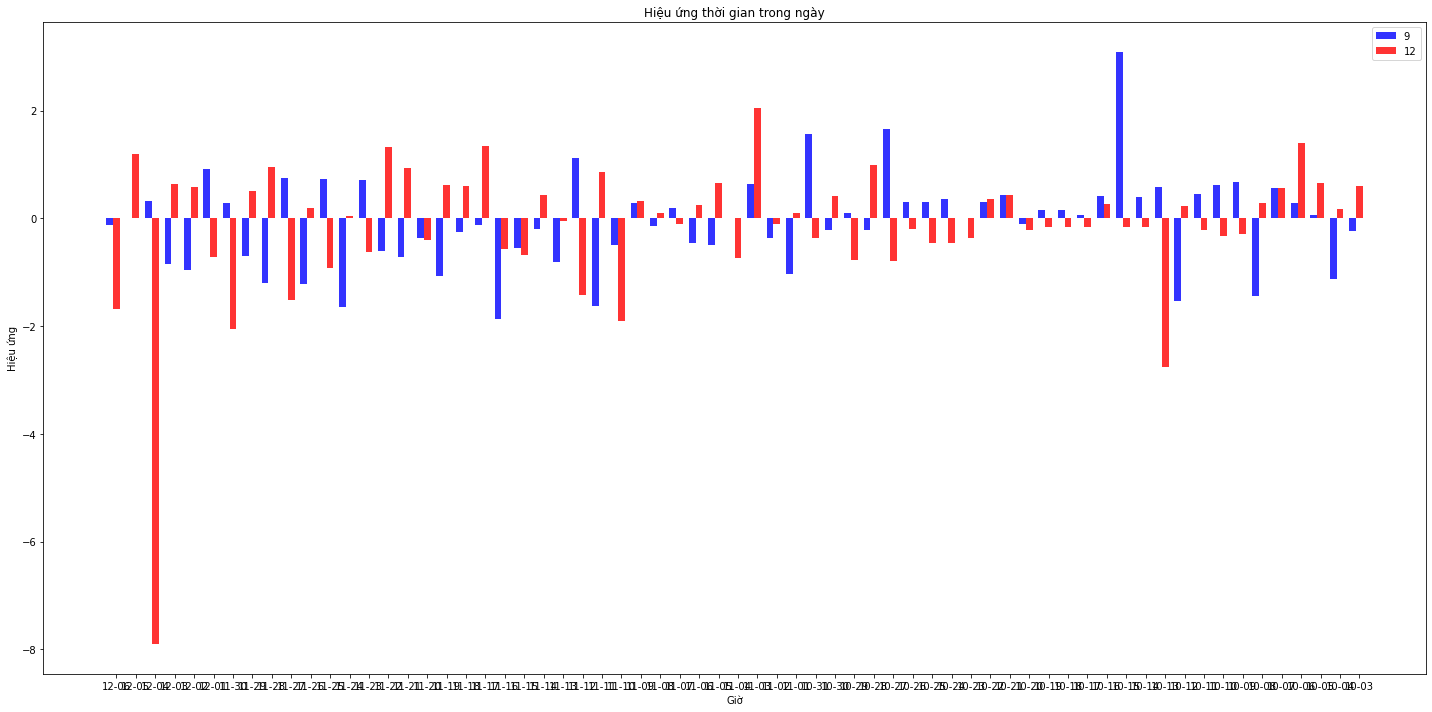

In [5]:
data_price_9_12 = data_prices[(data_prices['hour'] == 9) | (data_prices['hour'] == 12)]
x_label = unique_list(data_price_9_12['day'].to_list())

index = np.arange(diff_days(START_DATE, END_DATE, DATE_FORMAT))
bar_width = 0.35
opacity = 0.8

x = tuple(data_price_9_12[(data_prices['hour'] == 9)]['hour_return'])
y = tuple(data_price_9_12[(data_prices['hour'] == 12)]['hour_return'])


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='9')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='12')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple([label[5:] for label in x_label]))
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-6-e56fab158e75>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = tuple(data_price_2_15[(data_prices['hour'] == 2)]['hour_return'])
<ipython-input-6-e56fab158e75>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = tuple(data_price_2_15[(data_prices['hour'] == 15)]['hour_return'])


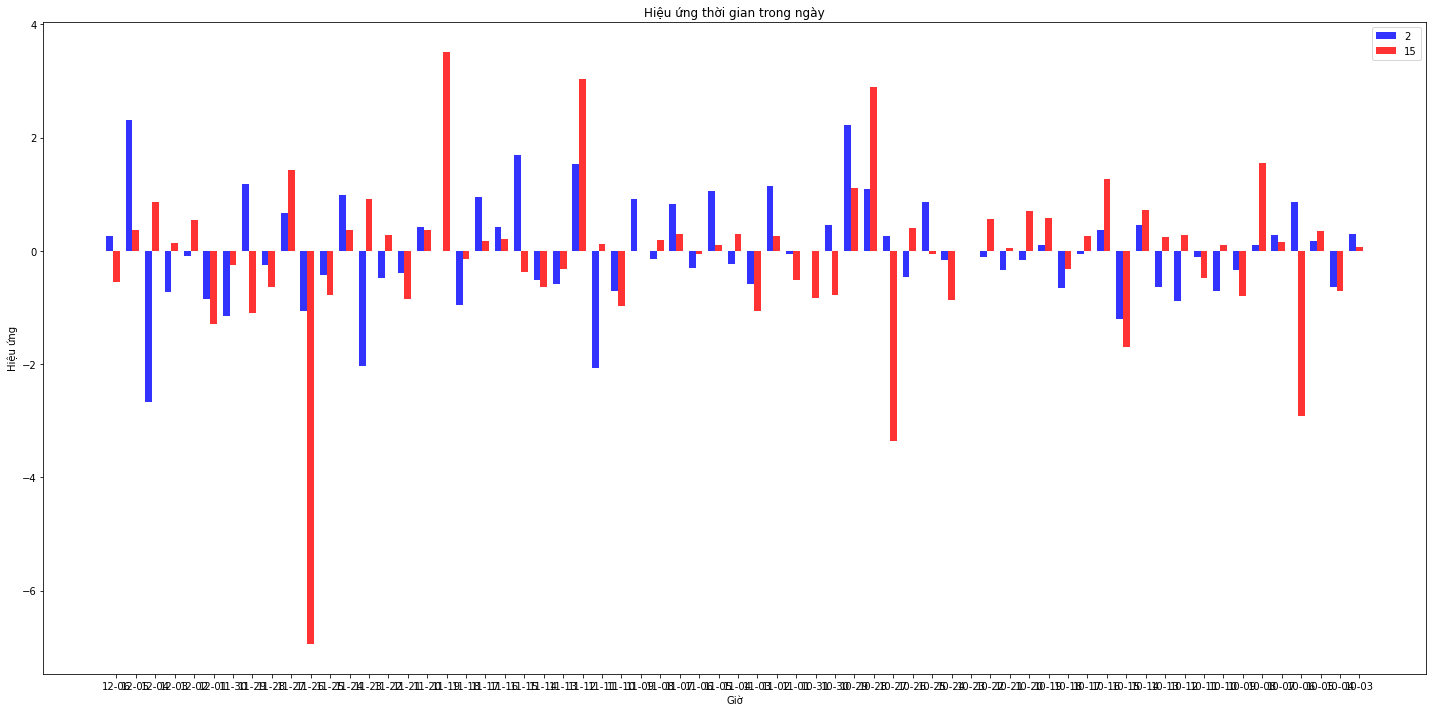

In [6]:
data_price_2_15 = data_prices[(data_prices['hour'] == 2) | (data_prices['hour'] == 15)]
x_label = unique_list(data_price_2_15['day'].to_list())

index = np.arange(diff_days(START_DATE, END_DATE, DATE_FORMAT))
bar_width = 0.35
opacity = 0.8

x = tuple(data_price_2_15[(data_prices['hour'] == 2)]['hour_return'])
y = tuple(data_price_2_15[(data_prices['hour'] == 15)]['hour_return'])

plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='2')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='15')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple([label[5:] for label in x_label]))
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-7-1b4c2cd384bb>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x = tuple(data_price_0_16[(data_prices['hour'] == 0)]['hour_return'])
<ipython-input-7-1b4c2cd384bb>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y = tuple(data_price_0_16[(data_prices['hour'] == 16)]['hour_return'])


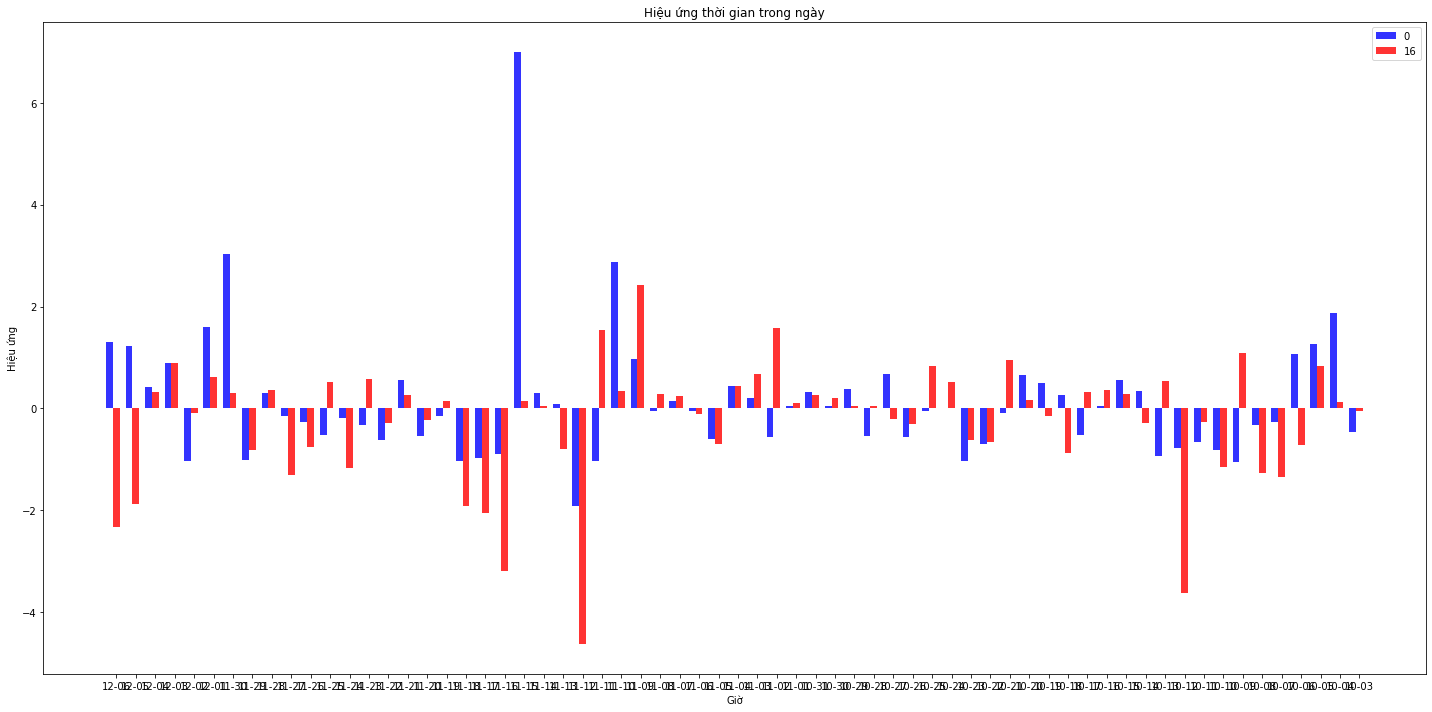

In [7]:
data_price_0_16 = data_prices[(data_prices['hour'] == 0) | (data_prices['hour'] == 16)]
x_label = unique_list(data_price_0_16['day'].to_list())

index = np.arange(diff_days(START_DATE, END_DATE, DATE_FORMAT))
bar_width = 0.35
opacity = 0.8

x = tuple(data_price_0_16[(data_prices['hour'] == 0)]['hour_return'])
y = tuple(data_price_0_16[(data_prices['hour'] == 16)]['hour_return'])

plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='0')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='16')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple([label[5:] for label in x_label]))
plt.legend()
plt.tight_layout()
plt.show()